# Partie I : Prise en des packages mvtnorm et MixSim

1) mvtnorm

Nous allons simuler une gaussienne multivariée en faisant fluctuer les paramètres sigma et mu


a) mu = (1,1) ; sigma=(1,1,1,5)
b) mu = (5,2) ; sigma=(1,1,1,4)
c) mu = (3,1) ; sigma=(2,2,2,3)


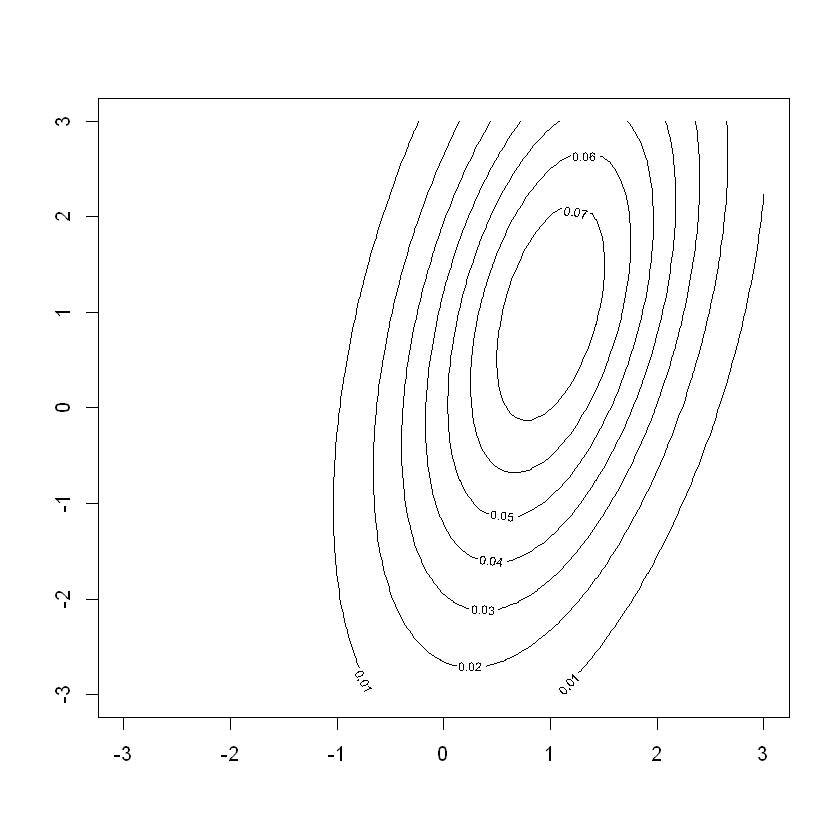

In [3]:
library(mvtnorm)
x.points <- seq(-3,3,length.out=100)
y.points <- x.points
z <- matrix(0,nrow=100,ncol=100)
mu <- c(1,1)
sigma <- matrix(c(1,1,1,5),nrow=2)
for (i in 1:100) {
  for (j in 1:100) {
    z[i,j] <- dmvnorm(c(x.points[i],y.points[j]),
                      mean=mu,sigma=sigma)
  }
}
contour(x.points,y.points,z)

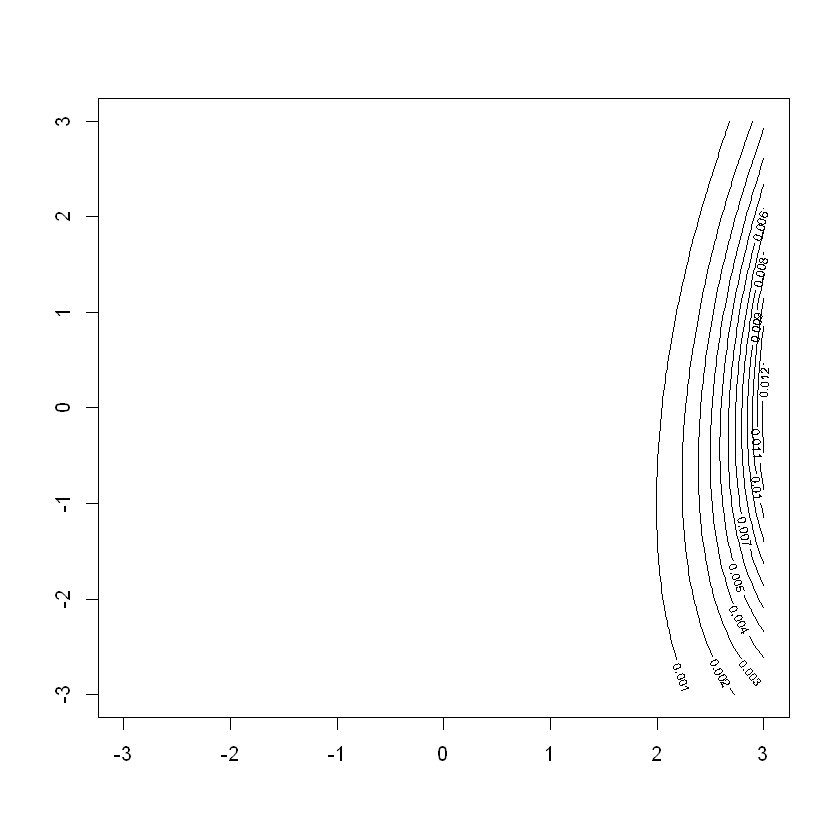

In [7]:
library(mvtnorm)
x.points <- seq(-3,3,length.out=100)
y.points <- x.points
z <- matrix(0,nrow=100,ncol=100)
mu <- c(5,2)
sigma <- matrix(c(1,1,1,4),nrow=2)
for (i in 1:100) {
  for (j in 1:100) {
    z[i,j] <- dmvnorm(c(x.points[i],y.points[j]),
                      mean=mu,sigma=sigma)
  }
}
contour(x.points,y.points,z)

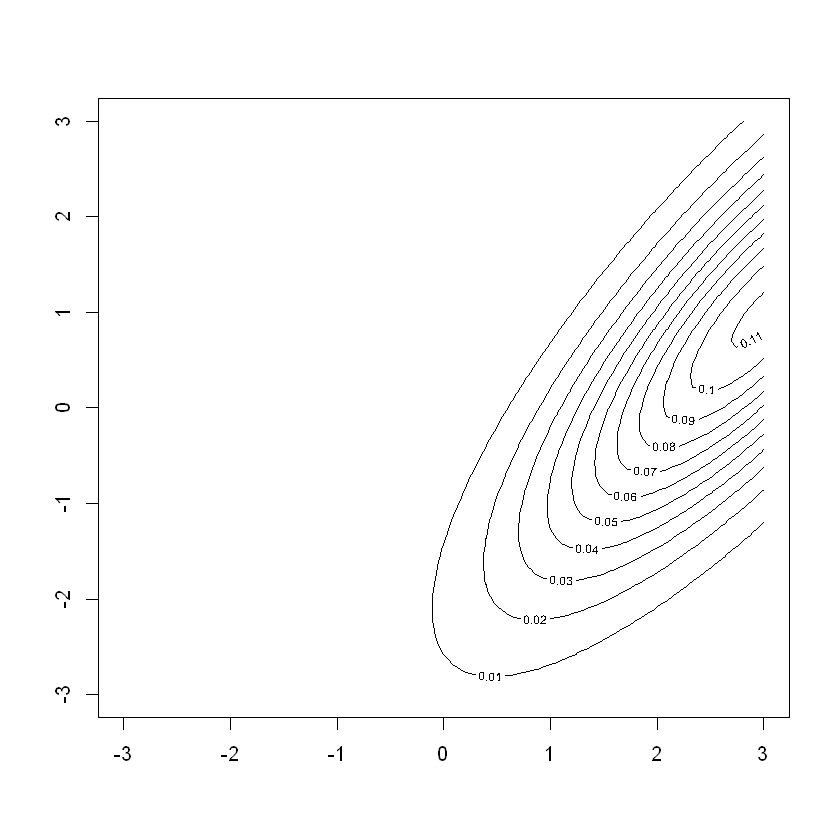

In [8]:
library(mvtnorm)
x.points <- seq(-3,3,length.out=100)
y.points <- x.points
z <- matrix(0,nrow=100,ncol=100)
mu <- c(3,1)
sigma <- matrix(c(2,2,2,3),nrow=2)
for (i in 1:100) {
  for (j in 1:100) {
    z[i,j] <- dmvnorm(c(x.points[i],y.points[j]),
                      mean=mu,sigma=sigma)
  }
}
contour(x.points,y.points,z)

In [ ]:
2) MixSlim

Dans cette partie nous allons simuler des jeux de données en utilisant le package mixslim.

a) Jeu 1 : 2 classes sphériques bien séparées
b) Jeu 2 : 3 classes sphériques avec un degré de mélange non-nul
c) Jeu 3 : 3 classes non-sphériques avec un degré de mélange non-nul



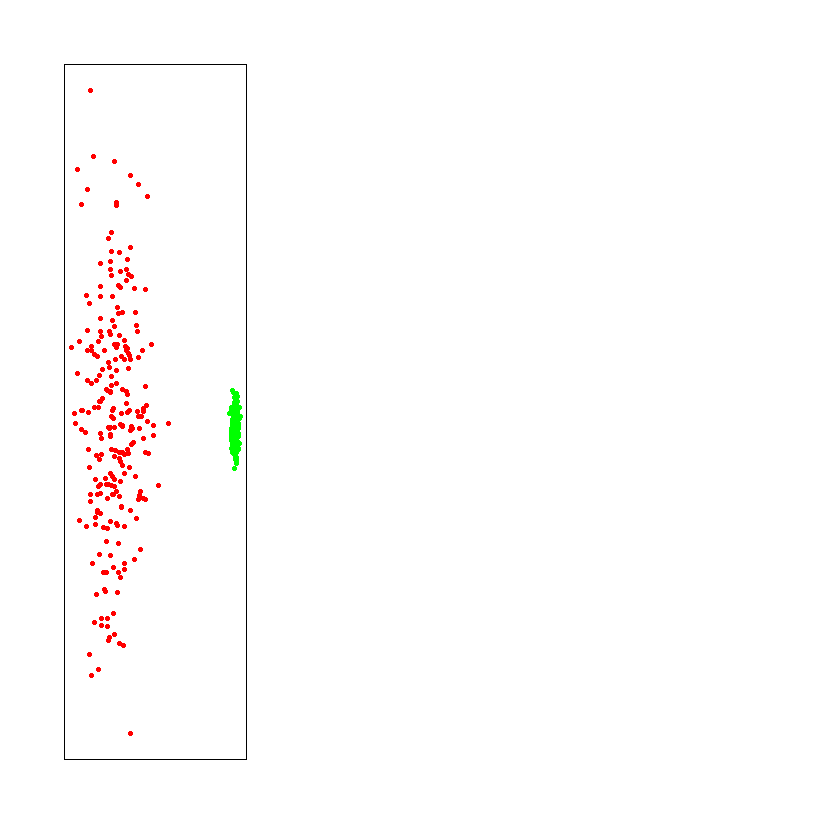

In [2]:
library(MixSim)
library(MASS)

#Jeu 1

set.seed(1234)
Q <-MixSim(BarOmega = 0, MaxOmega=0,K = 2, p = 2, sph = TRUE)
A <- simdataset(n = 500, Pi = Q$Pi, Mu = Q$Mu, S = Q$S)
colors <- c("red", "green","blue")
par(mfrow = c(1,3))
plot(A$X, col = colors[A$id], pch = 19, cex = 0.8, xlab = "", ylab = "", axes = FALSE)
box()

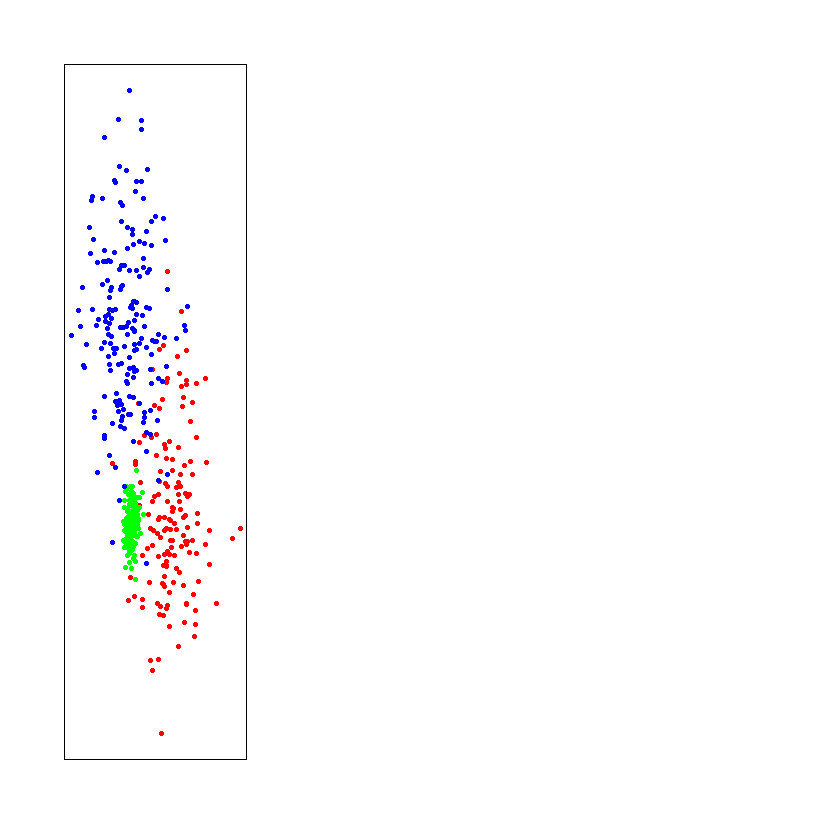

In [4]:
library(MixSim)
library(MASS)

#Jeu 2

set.seed(1234)
Q <-MixSim(BarOmega = 0.05, MaxOmega=0.1,K = 3, p = 2, sph = TRUE)
A <- simdataset(n = 500, Pi = Q$Pi, Mu = Q$Mu, S = Q$S)
colors <- c("red", "green","blue")
par(mfrow = c(1,3))
plot(A$X, col = colors[A$id], pch = 19, cex = 0.8, xlab = "", ylab = "", axes = FALSE)
box()

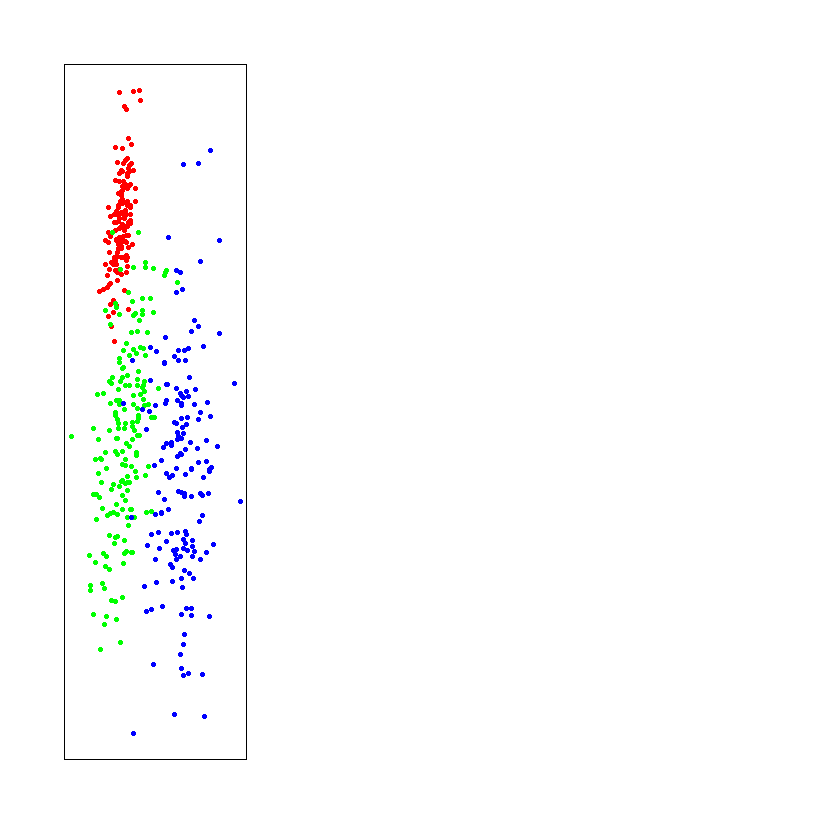

In [6]:
library(MixSim)
library(MASS)

#Jeu 3

set.seed(1234)
Q <-MixSim(BarOmega = 0.05, MaxOmega=0.1,K = 3, p = 2, sph = FALSE)
A <- simdataset(n = 500, Pi = Q$Pi, Mu = Q$Mu, S = Q$S)
colors <- c("red", "green","blue")
par(mfrow = c(1,3))
plot(A$X, col = colors[A$id], pch = 19, cex = 0.8, xlab = "", ylab = "", axes = FALSE)
box()

# Partie II : Classificateur linéaire et quadratique

Nous allons dans cette partie implémenter sous R une règle de classification quadratique et l'appliquer aux 3 dataset simulés.
Nous affichons ensuite les résultats graphiques : en encadré les "vraies" données, en ouvert les prédictions

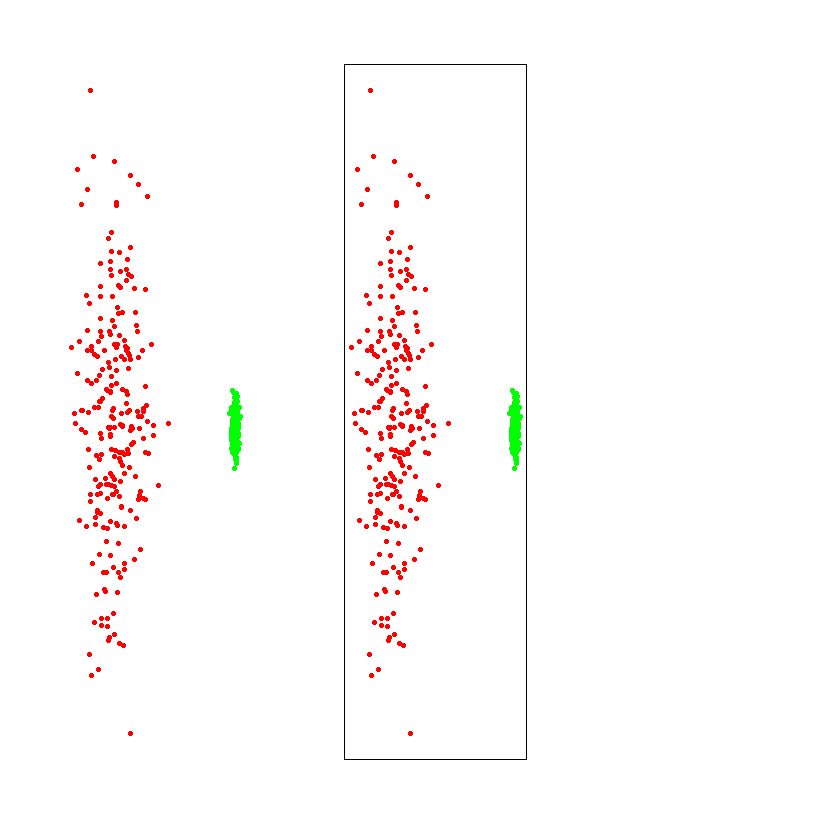

In [9]:
library(MixSim)


#JEU NUMERO 1

set.seed(1234)
Q <-MixSim(BarOmega = 0, MaxOmega=0,K = 2 , p = 2, sph = T)
A <- simdataset(n = 500, Pi = Q$Pi, Mu = Q$Mu, S = Q$S)

  classify<-function(jeu,data,id){
    
    #jeu : le mélange gaussien MixSim
    #data : le jeu de données simulé à partir de MixSim (vecteur 500x2)
    #id : la liste des id de classe associés au dataset (vecteur 500x1)
    
    #classes : ensemble des id de classe
    #pre : probas a priori des classes
    #means : moyennes
    #covar : matrice de variance/covariance
    #preds : vecteur colonne des classes prédites
    
    classes<-unique(id)
    pre<-jeu$Pi
    means<-jeu$Mu
    covar<-jeu$S
    
    preds<-c()
    
    for (k in 1:length(data[,1])){
      #class_temp : vecteur des valeurs de la règle des classifications par classe
      class_temp<-c()
      #Règle de classification
      for (i in 1:length(classes)){
        add<- -0.5*t(data[k,]-means[i,])%*%solve(covar[,,i])%*%(data[k,]-means[i,]) - 0.5*log(det(covar[,,i])) + log(pre[i])
        class_temp<-c(class_temp,add)
      }
      #Sélection du max et ajout au tableau des prévisions
      preds<-c(preds,classes[which.max(class_temp)])
    }
    return(preds)
  }

#Exécution

t=classify(Q,A$X, A$id)

#Affichage graphique

colors <- c("red", "green","blue")
par(mfrow = c(1,3))

#Données théoriques
plot(A$X, col = colors[A$id], pch = 19, cex = 0.8, xlab = "", ylab = "", axes = FALSE)

#Données prédites
plot(A$X, col = colors[t], pch = 19, cex = 0.8, xlab = "", ylab = "", axes = FALSE)

box()

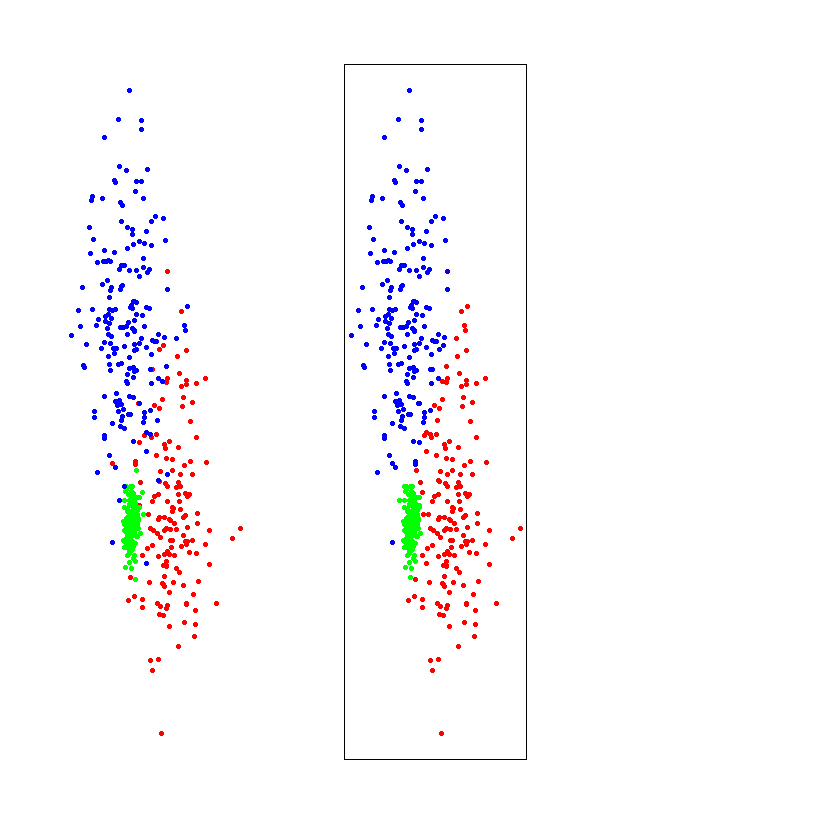

In [6]:
library(MixSim)

#Jeu NUMERO 2

set.seed(1234)
Q <-MixSim(BarOmega = 0.05, MaxOmega=0.1,K = 3 , p = 2, sph = T)
A <- simdataset(n = 500, Pi = Q$Pi, Mu = Q$Mu, S = Q$S)

  classify<-function(jeu,data,id){
    
    #jeu : le mélange gaussien MixSim
    #data : le jeu de données simulé à partir de MixSim (vecteur 500x2)
    #id : la liste des id de classe associés au dataset (vecteur 500x1)
    
    #classes : ensemble des id de classe
    #pre : probas a priori des classes
    #means : moyennes
    #covar : matrice de variance/covariance
    #preds : vecteur colonne des classes prédites
    
    classes<-unique(id)
    pre<-jeu$Pi
    means<-jeu$Mu
    covar<-jeu$S
    
    preds<-c()
    
    for (k in 1:length(data[,1])){
      #class_temp : vecteur des valeurs de la règle des classifications par classe
      class_temp<-c()
      #Règle de classification
      for (i in 1:length(classes)){
        add<- -0.5*t(data[k,]-means[i,])%*%solve(covar[,,i])%*%(data[k,]-means[i,]) - 0.5*log(det(covar[,,i])) + log(pre[i])
        class_temp<-c(class_temp,add)
      }
      #Sélection du max et ajout au tableau des prévisions
      preds<-c(preds,classes[which.max(class_temp)])
    }
    return(preds)
  }

#Exécution

t=classify(Q,A$X, A$id)

#Affichage graphique

colors <- c("red", "green","blue")
par(mfrow = c(1,3))

#Données théoriques
plot(A$X, col = colors[A$id], pch = 19, cex = 0.8, xlab = "", ylab = "", axes = FALSE)

#Données prédites
plot(A$X, col = colors[t], pch = 19, cex = 0.8, xlab = "", ylab = "", axes = FALSE)

box()

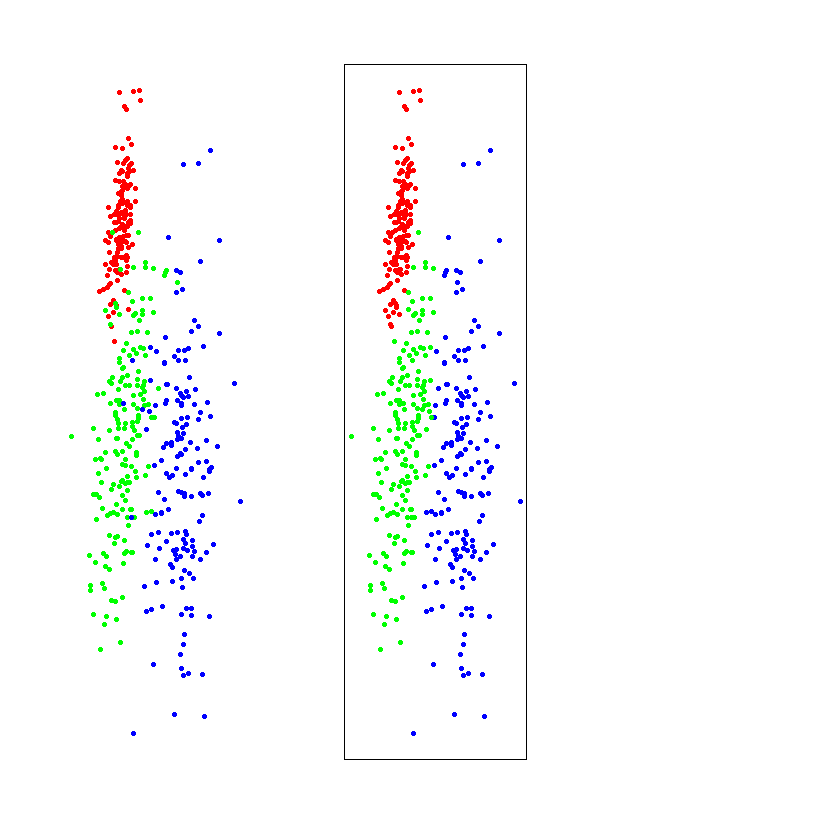

In [8]:
library(MixSim)

#JEU NUMERO 3

set.seed(1234)
Q <-MixSim(BarOmega = 0.05, MaxOmega=0.1,K = 3 , p = 2, sph = F)
A <- simdataset(n = 500, Pi = Q$Pi, Mu = Q$Mu, S = Q$S)

  classify<-function(jeu,data,id){
    
    #jeu : le mélange gaussien MixSim
    #data : le jeu de données simulé à partir de MixSim (vecteur 500x2)
    #id : la liste des id de classe associés au dataset (vecteur 500x1)
    
    #classes : ensemble des id de classe
    #pre : probas a priori des classes
    #means : moyennes
    #covar : matrice de variance/covariance
    #preds : vecteur colonne des classes prédites
    
    classes<-unique(id)
    pre<-jeu$Pi
    means<-jeu$Mu
    covar<-jeu$S
    
    preds<-c()
    
    for (k in 1:length(data[,1])){
      #class_temp : vecteur des valeurs de la règle des classifications par classe
      class_temp<-c()
      #Règle de classification
      for (i in 1:length(classes)){
        add<- -0.5*t(data[k,]-means[i,])%*%solve(covar[,,i])%*%(data[k,]-means[i,]) - 0.5*log(det(covar[,,i])) + log(pre[i])
        class_temp<-c(class_temp,add)
      }
      #Sélection du max et ajout au tableau des prévisions
      preds<-c(preds,classes[which.max(class_temp)])
    }
    return(preds)
  }

#Exécution

t=classify(Q,A$X, A$id)

#Affichage graphique

colors <- c("red", "green","blue")
par(mfrow = c(1,3))

#Données théoriques
plot(A$X, col = colors[A$id], pch = 19, cex = 0.8, xlab = "", ylab = "", axes = FALSE)

#Données prédites
plot(A$X, col = colors[t], pch = 19, cex = 0.8, xlab = "", ylab = "", axes = FALSE)

box()

#  Partie III : Exploitation des résultats

Dans cette partie nous proposons d'analyser les résultats à l'aune de la précision des prédictions.
Pour ca faire, nous implémentons la fonction suivante, qui détermine le pourcentage de prévisions exactes :

In [ ]:
  accuracy<-function(t1,t2){
    sum<-0
    for (i in 1:length(t1)){
      if (t1[i]==t2[i]){
        sum<-sum+1
      }
    }
    return(sum/length(t1))
  }

Nous obtenons les résulats suivants: 

Jeu 1 (BarOmega = 0, MaxOmega=0,K = 2 , p = 2, sph = TRUE) : 100%

Jeu 2 (BarOmega = 0.05, MaxOmega=0.1,K = 3, p = 2, sph = TRUE) : 93,8 %

Jeu 3 (BarOmega = 0.05, MaxOmega=0.1,K = 3 , p = 2, sph = FALSE) : 95%

Les classes du jeu 1 étant par construction bien séparées avec les paramètres BarOmega et MaxOmega nuls, il n'est pas étonnant de trouver un excellent pourcentage de prédiction, parfait même en l'occurence.
Logiquement pour la même raison, les jeux 2 et 3 auront un degré de précision moins important puisque leur degré de mélange est non nul.

Le jeu 2 semble avoir une précision très légèrement inférieure au jeu 3. La seule différence entre ces 2 jeux est au niveau du paramètre Spherical : TRUE pour le jeu 2 et FALSE pour le jeu 3. Toutefois, la différence est trop faible pour conclure que la sphéricité diminue la précision, d'autant plus que le jeu 1, à classes sphériques, a une précision de 100%.

On peut cependant conclure avec certitude que le degré de mélange des mélanges gaussiens affecte négativement la précision des prédictions.